Name: Ozan Müjde

ID: 181101050

Course: BIL470

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
import numpy as np
from itertools import cycle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score


import random


%matplotlib inline 
from dt import DecisionTreeClassifier
from kmeans import KMeansClusterClassifier

In [5]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data = data.drop(columns = ["Id"])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# to display stats about data
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# basic infos about data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# to display number of samples on each class
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
# Is there any missing value
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:>

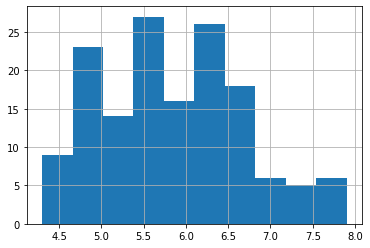

In [11]:
# histograms
data['SepalLengthCm'].hist()

<AxesSubplot:>

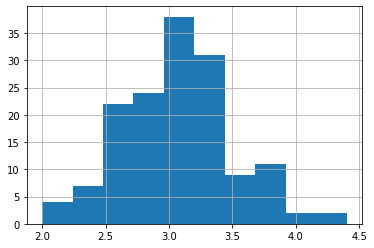

In [12]:
data['SepalWidthCm'].hist()

<AxesSubplot:>

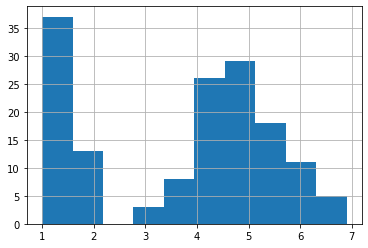

In [13]:
data['PetalLengthCm'].hist()

<AxesSubplot:>

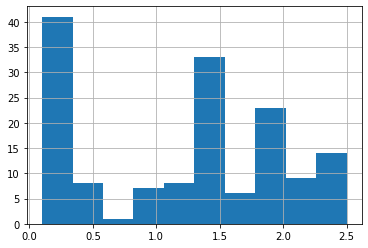

In [14]:
data['PetalWidthCm'].hist()

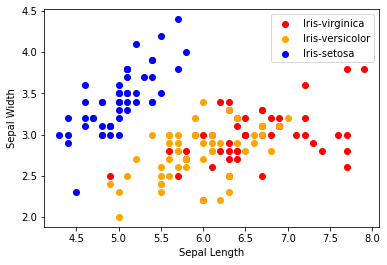

In [15]:
# scatterplot
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

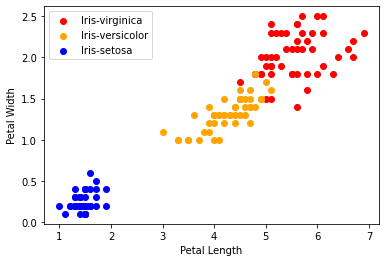

In [16]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

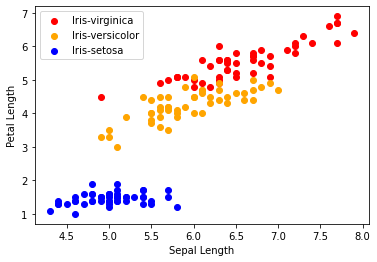

In [17]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

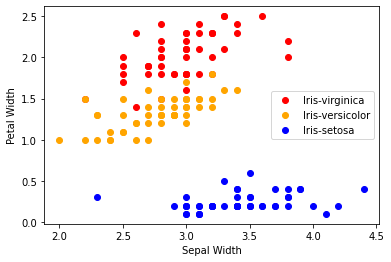

In [18]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [19]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

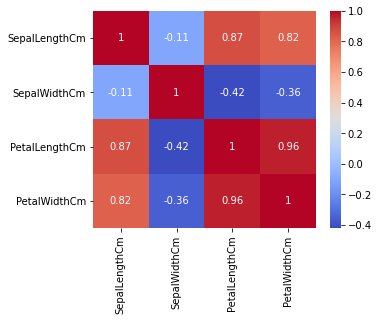

In [20]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

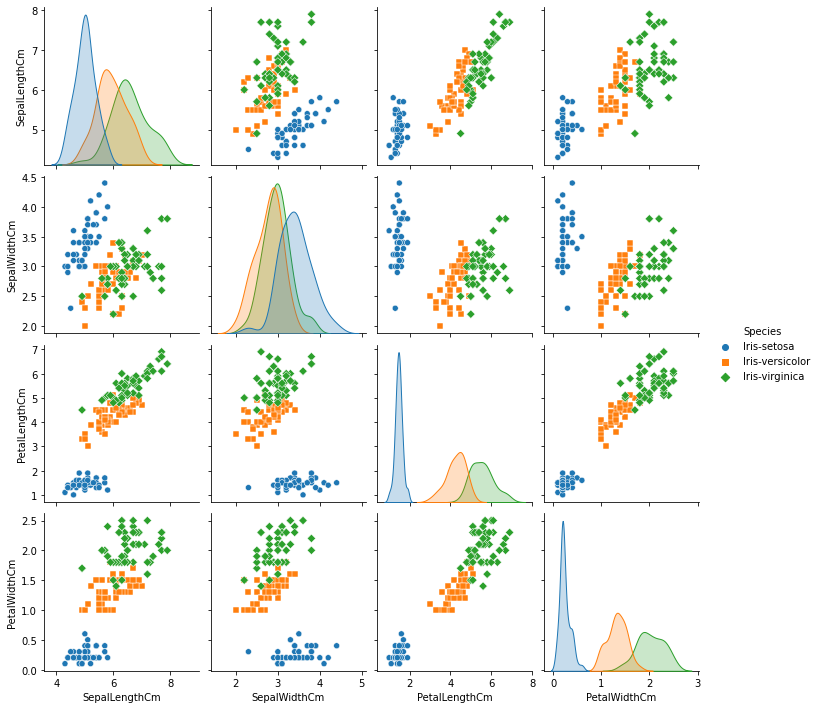

In [21]:
sns.pairplot(data, hue = 'Species', markers=["o", "s", "D"])

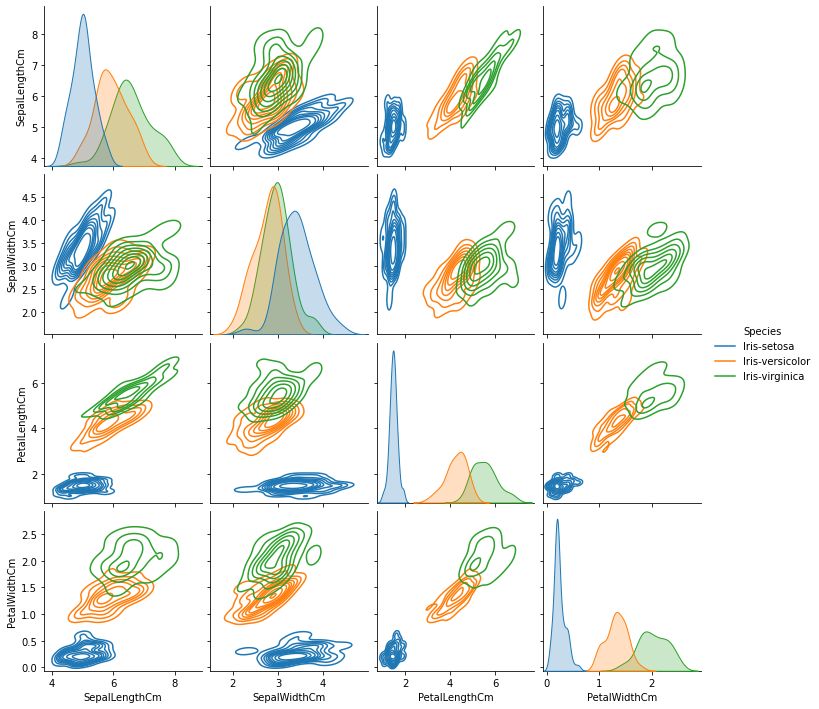

In [22]:
kde_graph = sns.pairplot(data, hue = 'Species', kind='kde')


# Exploratory Data Analysis (EDA)

 * Read Dataset
 * Perform EDA

# Train the classifier

Burada 120 ve 30 eleman kullanarak agaclari bastim. Ekstra olarak agaclarin genel dogruluklarinida elle hesaplayip basmak istedim daha sonradan biri bunlari göstermek icin sklearn kullanabilir miyiz diye sormus ama onu gorene kadar bunu yapmistim koymak istedim -Genelde test 28-30 arası buluyor-

In [23]:
inputArray = data.values.tolist()
random.shuffle(inputArray)
dtc = DecisionTreeClassifier(max_depth=5,data =inputArray)
X_train, X_test, Y_test, test_data, X_,Y_Train,test = dtc.split_data()
print("------------Tree with 120 element------------")
trainNode , trainList = dtc.fit(X_train,Y_Train)

------------Tree with 120 element------------
120
Petal Width is <= 0.6 gini= 0.6640277777777779 samples= 120
--> True:
 [43, 0, 0]
--> False:
 Petal Width is <= 1.7 gini= 0.4958677685950414 samples= 77
 --> True:
  Petal Length is <= 4.9 gini= 0.21875 samples= 40
  --> True:
   Petal Width is <= 1.6 gini= 0.05709342560553639 samples= 34
   --> True:
    [0, 33, 0]
   --> False:
    [0, 0, 1]
  --> False:
   Petal Width is <= 1.5 gini= 0.4444444444444444 samples= 6
   --> True:
    [0, 0, 3]
   --> False:
    Petal Length is <= 5.1 gini= 0.4444444444444445 samples= 3
    --> True:
     [0, 2, 0]
    --> False:
     [0, 0, 1]
 --> False:
  [0, 0, 37]


In [24]:
kmean1 = KMeansClusterClassifier(n_cluster=3)
data.sample(frac=1)
x = data.iloc[:, :-1].values #last column values excluded
y = data.iloc[:, -1].values #last column value
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
y_train = kmean1.transformY(y_train)
y_test = kmean1.transformY(y_test)



In [25]:
def elbow(n, threshold):
    min = 1000
    index = -1
    arr = [0 for i in range(1, n)]
    for i in range(1, n):
        kmean = KMeansClusterClassifier(n_cluster=i)
        clusters, euc, _ = kmean.fit(x_train, y_train)
        arr[i-1] = euc
        if euc + threshold < min:
            min = euc
            cluster = i
        # print(euc
    return cluster, arr


Ilk değer kaç cluster için test edileceği, ikinci değer kaç euc azalmasına kadar ilerleyeceği

1.9632269753115978
{0: 2}
0.8806367220742507
{0: 2, 1: 0}
0.6492872054227999
{0: 2, 1: 1, 2: 0}
0.5568716259843142
{0: 2, 1: 1, 2: 0, 3: 1}
0.5014249036424359
{0: 2, 1: 1, 2: 0, 3: 1, 4: 2}
0.4796223192857856
{0: 2, 1: 1, 2: 0, 3: 1, 4: 2, 5: 1}
0.43210891035413734
{0: 2, 1: 1, 2: 0, 3: 1, 4: 2, 5: 1, 6: 0}
0.40513497955114863
{0: 2, 1: 1, 2: 0, 3: 1, 4: 2, 5: 1, 6: 0, 7: 2}
0.39734268932599365
{0: 2, 1: 1, 2: 0, 3: 1, 4: 2, 5: 1, 6: 0, 7: 2, 8: 1}
=======ELBOW POINT=======
7


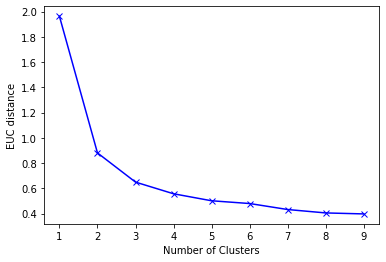

In [26]:
k, arr = elbow(10, threshold=0.05)
K = range(1, 10)
print("=======ELBOW POINT=======")
print(k)
plt.xlabel("Number of Clusters")
plt.ylabel("EUC distance")
plt.plot(K, arr, 'bx-')


Hocam özellikle verinin yapısından dolayı 1 ve 2 kullanılamaz diyebiliriz 3 vs kullanılabilir olsada ileride 6 7 gibi veri düzelmeye başlıyor

In [27]:

kmean = KMeansClusterClassifier(n_cluster=k)
centroids, euc, clusters = kmean.fit(x_train,y_train)
pred_test = kmean.predict(x_test)
pred_train = kmean.predict(x_train)

0.43210891035413734
{0: 2, 1: 1, 2: 0, 3: 1, 4: 2, 5: 1, 6: 0}


In [28]:
print("=======CONFUSION MATRIX TRAIN===========")
print(confusion_matrix(y_train, pred_train))
print("=======ACCURACY OF TRAIN===========")
print(accuracy_score(y_train, pred_train))

=======CONFUSION MATRIX TRAIN===========
[[39  0  0]
 [ 0 37  0]
 [ 0 11 33]]
=======ACCURACY OF TRAIN===========
0.9083333333333333


In [29]:
print(" =======CLASSIFICATION REPORT OF TRAIN===========")
print(classification_report(y_train, pred_train))

 =======CLASSIFICATION REPORT OF TRAIN===========
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.77      1.00      0.87        37
           2       1.00      0.75      0.86        44

    accuracy                           0.91       120
   macro avg       0.92      0.92      0.91       120
weighted avg       0.93      0.91      0.91       120



In [30]:
print("=======CONFUSION MATRIX TEST===========")
print(confusion_matrix(y_test, pred_test))
print("=======ACCURACY OF TEST===========")
print(accuracy_score(y_test, pred_test))

=======CONFUSION MATRIX TEST===========
[[11  0  0]
 [ 0 13  0]
 [ 0  3  3]]
=======ACCURACY OF TEST===========
0.9


In [31]:
print(" =======CLASSIFICATION REPORT OF TEST===========")
print(classification_report(y_test, pred_test))

 =======CLASSIFICATION REPORT OF TEST===========
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.81      1.00      0.90        13
           2       1.00      0.50      0.67         6

    accuracy                           0.90        30
   macro avg       0.94      0.83      0.85        30
weighted avg       0.92      0.90      0.89        30



Assagidaki kismi internetten aldim

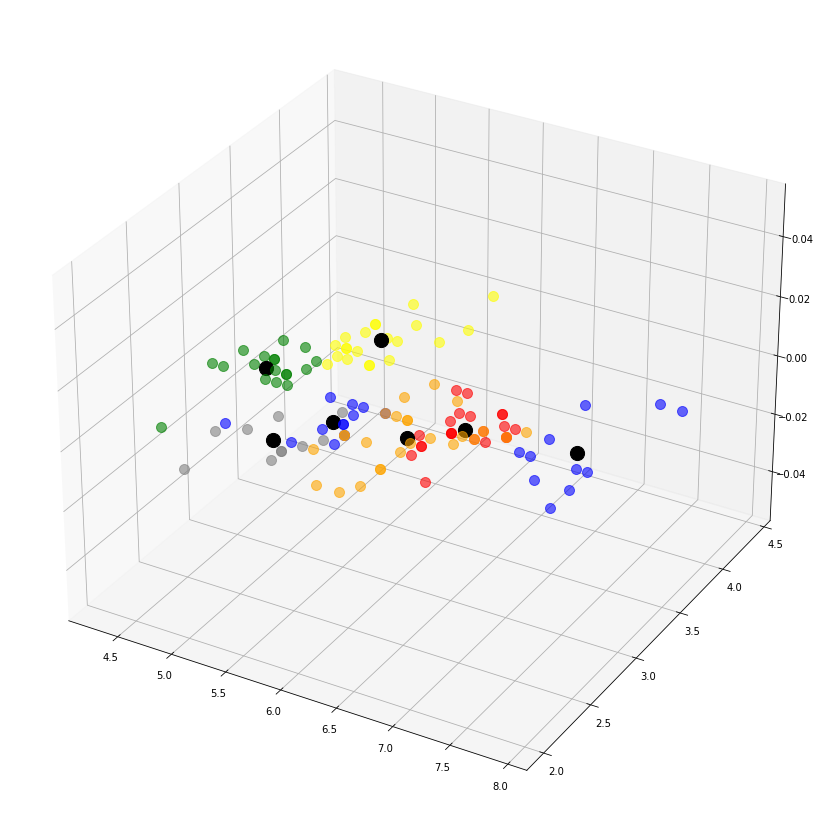

In [32]:
# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (15,15))
#
colors = ['red', 'blue' , 'green', 'orange', 'blue', 'gray', 'yellow', 'purple']
# plt.figure(figsize = (6, 4))  
#Plotting the centroids of the clusters
ax = fig.add_subplot(111, projection='3d')
for i in range(k):
        for cluster in clusters[i]:
              plt.scatter(cluster[0], cluster[1],s = 100 ,c=colors[i % k], alpha=0.6)          
        plt.scatter(centroids[i][0], centroids[i][1], c='black', s=200)

plt.show()

In [33]:
def inttoClass(number):
    if number == 0:
        return 'Iris-setosa'
    elif number == 1:
        return 'Iris-versicolor'
    elif number == 2:
        return 'Iris-virginica'

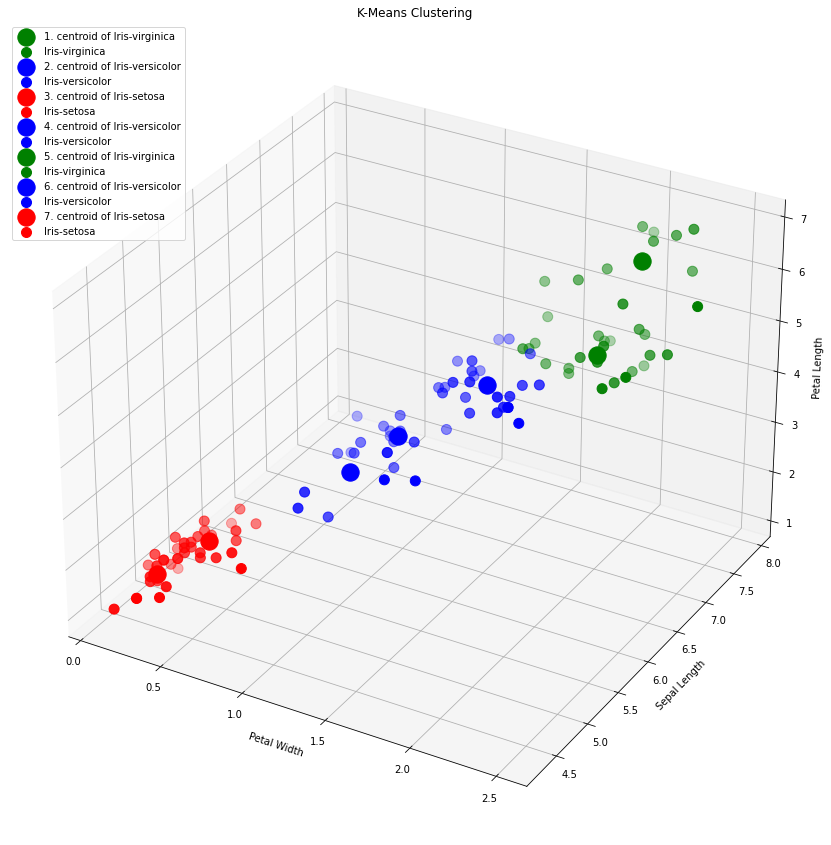

In [94]:
fig = plt.figure(figsize = (15,15))
colors = ['red', 'blue' , 'green', 'orange', 'blue', 'gray', 'yellow', 'purple']
ax = fig.add_subplot(111, projection='3d')
for i in range(k):      
      ax.scatter(centroids[i][3], centroids[i][0],centroids[i][2],s = 300,marker='o',c=colors[kmean.centPredict[i]],label=str(i+1)+'. centroid of '+str(inttoClass(kmean.centPredict[i])))
      clusterarr = np.array(clusters[i])
      ax.scatter(clusterarr[:,3], clusterarr[:,0],clusterarr[:,2],s = 100,marker='o',c=colors[kmean.centPredict[i]],label=inttoClass(kmean.centPredict[i]))
      #for cluster in clusters[i]:
            #ax.scatter(cluster[3], cluster[0],cluster[2],s = 100 ,marker='o',c=colors[kmean.centPredict[i]])
ax.set_title('K-Means Clustering')
ax.set_xlabel('Petal Width')
ax.set_ylabel('Sepal Length')
ax.set_zlabel('Petal Length')
ax.legend()
plt.show()

In [34]:
roc = list(range(3))
y_trains = list(range(3))
train_preds = list(range(3))
test_preds = list(range(3))
y_tests = list(range(3))
fpr_test = list(range(3))
fpr_train = list(range(3))
tpr_test = list(range(3))
tpr_train = list(range(3))
roc_auc_train= list(range(3))
roc_auc_test= list(range(3))
train_pred = np.array(pred_train)
y_nptrain = np.array(y_train)
y_nptest = np.array(y_test)
test_pred = np.array(pred_test)
for i in range(3):
    y_trains[i] = (y_nptrain == i)
    y_tests[i] = (y_nptest == i)
    train_preds[i] = (train_pred == i)
    test_preds[i] = (test_pred == i)

In [35]:
for i in range(3):
    fpr_train[i], tpr_train[i], _ = roc_curve(y_trains[i], train_preds[i])
    fpr_test[i], tpr_test[i], _ = roc_curve(y_tests[i], test_preds[i])
    roc_auc_train[i] = roc_auc_score(y_trains[i],train_preds[i])
    roc_auc_test[i] = roc_auc_score(y_tests[i],test_preds[i])

In [36]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, label = label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")

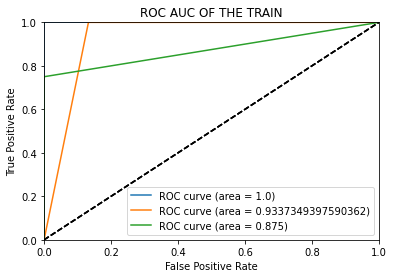

In [37]:
for i in range(3):
    plt.title('ROC AUC OF THE TRAIN')
    plot_roc_curve(fpr_train[i],tpr_train[i], label='ROC curve (area = {})'.format(roc_auc_train[i]))

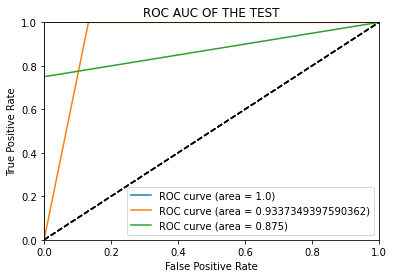

In [38]:
for i in range(3):
    plt.title('ROC AUC OF THE TEST')
    plot_roc_curve(fpr_train[i],tpr_train[i], label='ROC curve (area = {})'.format(roc_auc_train[i]))

In [39]:
print("------------Accuracy with 120 element------------")
trainPredict = dtc.predict(trainList,trainNode)
print("------------Accuracy with 30 element------------")
predicted_test = dtc.predict(test_data,trainNode)


------------Accuracy with 120 element------------
Correct Labels: 120 Accuracy is: 100.0
------------Accuracy with 30 element------------
Correct Labels: 29 Accuracy is: 96.66666666666667


```python
clf = DecisionTreeClassifier(max_depth=max_depth)
```

 * train the classifier
 * calculate metrics


# Results

Confusion Matrix non-norm (Hocanınkiyle slaytındaki ile farkli)

In [40]:

yhat = dtc.yhat
trainData = dtc.trainData
print(predicted_test)
print(yhat)
print("---------CONF TEST-----------")
print(confusion_matrix(yhat, predicted_test))
print("---------CONF TRAIN-----------")
print(confusion_matrix(trainData, trainPredict))
confArr = confusion_matrix(yhat, predicted_test)
confArrTrain = confusion_matrix(trainData, trainPredict)


[1, 2, 2, 0, 2, 1, 2, 1, 1, 2, 1, 2, 0, 0, 1, 1, 2, 1, 0, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 2]
[1, 2, 1, 0, 2, 1, 2, 1, 1, 2, 1, 2, 0, 0, 1, 1, 2, 1, 0, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 2]
---------CONF TEST-----------
[[ 7  0  0]
 [ 0 14  1]
 [ 0  0  8]]
---------CONF TRAIN-----------
[[43  0  0]
 [ 0 35  0]
 [ 0  0 42]]


Hocanin verdigi 2 boyutlu gibi düsünmeye calisip 3 class icin ayri ayri yaptım ortak sadece acc hesapladim o da üstte tree nin altinda normalde de diagonal / tum array

Recall : Gerçekten x classında olanlar / X classı olarak tahmin edilenlerin tamamı

Precision : Gerçekten x classında olanlar / gerçekte X classında olup başka labellananlar  + X olup X labellananlar(X olarak labellanan her sey)

In [41]:
print("-------Precision 0 Test-------")
p0 = confArr[0][0] / (confArr[0][0] + confArr[1][0] +confArr[2][0])
print(p0)
print("--------Accuracy 0 Test ---------")
a0 = confArr[0][0] / (confArr[0][0] + confArr[0][1] + confArr[0][2] +confArr[1][0] +confArr[2][0])
print(a0)
print("--------Recall 0 Test -----------")
r0 =confArr[0][0] / (confArr[0][0] + confArr[0][1] +confArr[0][2])
print(r0)
f10= (2*p0*r0) /(p0+r0)
print("--------F1 Score 0 Test-----------")
print(f10)

-------Precision 0 Test-------
1.0
--------Accuracy 0 Test ---------
1.0
--------Recall 0 Test -----------
1.0
--------F1 Score 0 Test-----------
1.0


In [42]:
print("-------Precision 0 Train-------")
p0t = confArrTrain[0][0] / (confArrTrain[0][0] + confArrTrain[1][0] +confArrTrain[2][0])
print(p0t)
print("--------Accuracy 0 Train ---------")
a0t = confArrTrain[0][0] / (confArrTrain[0][0] + confArrTrain[0][1] + confArrTrain[0][2] +confArrTrain[1][0] +confArr[2][0])
print(a0t)
print("--------Recall 0 Train -----------")
r0t =confArrTrain[0][0] / (confArrTrain[0][0] + confArrTrain[0][1] +confArrTrain[0][2])
print(r0t)
f10t= (2*p0t*r0t) /(p0t+r0t)
print("--------F1 Score 0 Train-----------")
print(f10t)

-------Precision 0 Train-------
1.0
--------Accuracy 0 Train ---------
1.0
--------Recall 0 Train -----------
1.0
--------F1 Score 0 Train-----------
1.0


In [43]:
print("-------Precision 1 Test-------")
p1 = confArr[1][1] / (confArr[0][1] + confArr[1][1] +confArr[2][1])
print(p1)
print("--------Accuracy 1 Test---------")
a1 = confArr[1][1] / (confArr[1][1] + confArr[0][1] + confArr[2][1] +confArr[1][0] +confArr[1][2])
print(a1)
print("--------Recall 1 Test -----------")
r1 =confArr[1][1] / (confArr[1][0] + confArr[1][1] +confArr[1][2])
print(r1)
f11= (2*p1*r1) /(p1+r1)
print("--------F1 Score 1 Test-----------")
print(f11)


-------Precision 1 Test-------
1.0
--------Accuracy 1 Test---------
0.9333333333333333
--------Recall 1 Test -----------
0.9333333333333333
--------F1 Score 1 Test-----------
0.9655172413793104


In [44]:
print("-------Precision 1 Train-------")
p1t = confArrTrain[1][1] / (confArrTrain[0][1] + confArrTrain[1][1] +confArrTrain[2][1])
print(p1t)
print("--------Accuracy 1 Train---------")
a1t = confArrTrain[1][1] / (confArrTrain[1][1] + confArrTrain[0][1] + confArrTrain[2][1] +confArrTrain[1][0] +confArrTrain[1][2])
print(a1t)
print("--------Recall 1 Train -----------")
r1t =confArrTrain[1][1] / (confArrTrain[1][0] + confArrTrain[1][1] +confArrTrain[1][2])
print(r1t)
f11t= (2*p1t*r1t) /(p1t+r1t)
print("--------F1 Score 1 Train-----------")
print(f11t)


-------Precision 1 Train-------
1.0
--------Accuracy 1 Train---------
1.0
--------Recall 1 Train -----------
1.0
--------F1 Score 1 Train-----------
1.0


In [45]:
print("-------Precision 2 Test -------")
p2 = confArr[2][2] / (confArr[0][2] + confArr[1][2] +confArr[2][2])
print(p2)
print("--------Accuracy 2 Test ---------")
a2 = confArr[2][2] / (confArr[2][2] + confArr[0][2] + confArr[1][2] +confArr[2][0] +confArr[2][1])
print(a2)
print("--------Recall 2 Test -----------")
r2 =confArr[2][2] / (confArr[2][0] + confArr[2][1] +confArr[2][2])
print(r2)
f12= (2*p2*r2) /(p2+r2)
print("--------F1 Score 2 Test-----------")
print(f12)

-------Precision 2 Test -------
0.8888888888888888
--------Accuracy 2 Test ---------
0.8888888888888888
--------Recall 2 Test -----------
1.0
--------F1 Score 2 Test-----------
0.9411764705882353


In [46]:
print("-------Precision 2 Train -------")
p2t = confArrTrain[2][2] / (confArrTrain[0][2] + confArrTrain[1][2] +confArrTrain[2][2])
print(p2t)
print("--------Accuracy 2 Train ---------")
a2t = confArrTrain[2][2] / (confArrTrain[2][2] + confArrTrain[0][2] + confArrTrain[1][2] +confArrTrain[2][0] +confArrTrain[2][1])
print(a2t)
print("--------Recall 2 Train -----------")
r2t =confArrTrain[2][2] / (confArrTrain[2][0] + confArrTrain[2][1] +confArrTrain[2][2])
print(r2t)
f12t= (2*p2t*r2t) /(p2t+r2t)
print("--------F1 Score 2 Train-----------")
print(f12t)

-------Precision 2 Train -------
1.0
--------Accuracy 2 Train ---------
1.0
--------Recall 2 Train -----------
1.0
--------F1 Score 2 Train-----------
1.0


Normalized Confusion Matrix 

In [47]:
normConfArr = []
for number in confArr:
    normConfArr.append(number / 30)
print(normConfArr[0])
print(normConfArr[1])
print(normConfArr[2])

[0.23333333 0.         0.        ]
[0.         0.46666667 0.03333333]
[0.         0.         0.26666667]


In [48]:
normConfArrTrain = []
for number in confArrTrain:
    normConfArrTrain.append(number / 120)
print(normConfArrTrain[0])
print(normConfArrTrain[1])
print(normConfArrTrain[2])

[0.35833333 0.         0.        ]
[0.         0.29166667 0.        ]
[0.   0.   0.35]


 * Plot metrics
 * Output a confusion matrix

ROC CURVE (sklearn doc dan aldim <https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html>) Datayı önceden binarize edip 2d roc gibi bir kaç kez yapıyoruz

In [49]:

yhat = label_binarize(yhat, classes=[0, 1, 2])
trainData = label_binarize(trainData, classes=[0, 1, 2])
predicted_test = label_binarize(predicted_test, classes=[0, 1, 2])
trainPredict = label_binarize(trainPredict, classes=[0, 1, 2])
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = yhat.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(yhat[:, i], predicted_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fprtr = dict()
tprtr = dict()
roc_auctr = dict()
for i in range(n_classes):
    fprtr[i], tprtr[i], _ = roc_curve(trainData[:, i], trainPredict[:, i])
    roc_auctr[i] = auc(fprtr[i], tprtr[i])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
all_fprtr = np.unique(np.concatenate([fprtr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
mean_tprtr = np.zeros_like(all_fprtr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    mean_tprtr += interp(all_fprtr, fprtr[i], tprtr[i])
mean_tpr /= n_classes
mean_tprtr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
fprtr["macro"] = all_fprtr
tprtr["macro"] = mean_tprtr
roc_auctr["macro"] = auc(fprtr["macro"], tprtr["macro"])


<ipython-input-49-2a929e605aa4>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-49-2a929e605aa4>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tprtr += interp(all_fprtr, fprtr[i], tprtr[i])


ROC FOR TEST

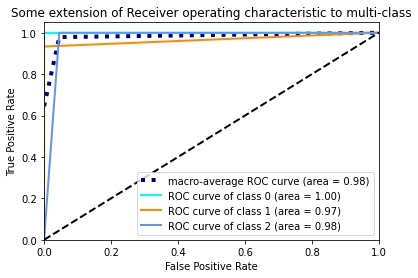

In [50]:
lw = 2
plt.figure()
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

ROC FOR TRAIN

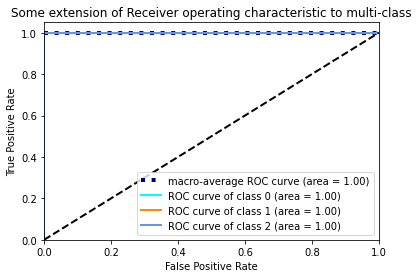

In [51]:
plt.figure()
plt.plot(fprtr["macro"], tprtr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auctr["macro"]),
         color='navy', linestyle=':', linewidth=4)
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fprtr[i], tprtr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auctr[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

area under the ROC curve (AUC) For Test

In [52]:
macro_roc_auc_ovo = roc_auc_score(yhat, predicted_test, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(yhat, predicted_test, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(yhat,predicted_test, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(yhat, predicted_test, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.981313 (macro),
0.977273 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.981313 (macro),
0.977273 (weighted by prevalence)


area under the ROC curve (AUC) For Trainm

In [53]:
macro_roc_auc_ovo = roc_auc_score(trainData, trainPredict, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(trainData, trainPredict, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(trainData,trainPredict, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(trainData, trainPredict, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
1.000000 (macro),
1.000000 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
1.000000 (macro),
1.000000 (weighted by prevalence)


HOCAM şimdi şu baya rahatça anlaşılıyorki tree yapısı  train de modelin getirdiği bir şekilde oldukça iyi, genelde overfit'e meyilli. Test verilerinde ise neredeyse aynı sonuçlar elde ettiğimizi söyleyebiliriz arada tabii ki şu anki durum gibi tree testte ve train de tam doğrulukla bulabiliyor,  sonuçlar pek farklı değil elbow threshold'u eğer çok düşük ya da 0 ayarlanırsa train verisine oldukça bağlı şekilde noktalanabilir. Hem train hem de test verisi yüksek clusterlarda oldukça düzgün -testte vs 0.93+- sonuçlar veriyor.Genelde Cluster'lanmaya oldukça elverişli olan bu veride zaten veriye bağımlı olan tree'ninde benzer sonuçlar vermesi oldukça doğal 2 modelin de benzer sonuçlar vermesi modelleri doğru bir şekilde kurduğumuzu ve kullandığımızı gösteriyor. Ama supervised learning modeli olan tree'nin bu veride daha yüksek doğruluk payı vermesi  bu 2 çok basit algoritmada da olsa eğer verimizde label varsa supervised bir model kullanmanın daha mantıklı olduğunu gösteriyor. 